# Train/Test Split

(353, 10) (353,)
(89, 10) (89,)
Score: 0.5044286869597645


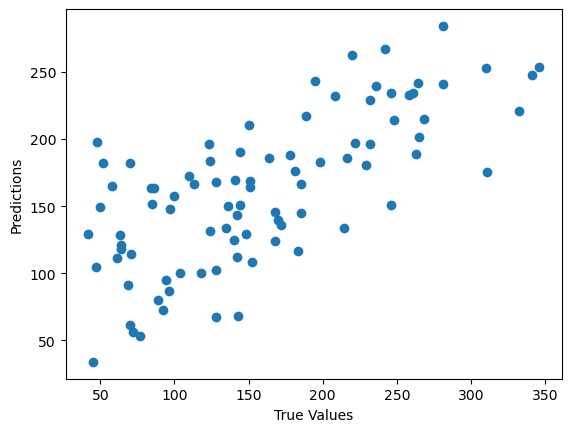

In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")


print("Score:", model.score(X_test, y_test))

# Leave One Out Split

In [2]:
import numpy as np

# leave one out cross validation
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


# K-Fold Split

In [3]:
import numpy as np

# k-fold cross validation
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
 
 print(X_train, X_test, y_train, y_test)

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
[[1 2]
 [3 4]] [[1 2]
 [3 4]] [3 4] [1 2]
TRAIN: [0 1] TEST: [2 3]
[[1 2]
 [3 4]] [[1 2]
 [3 4]] [1 2] [3 4]


# K-Fold Cross Validation

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]
Cross-Predicted Accuracy: 0.4908065838640774


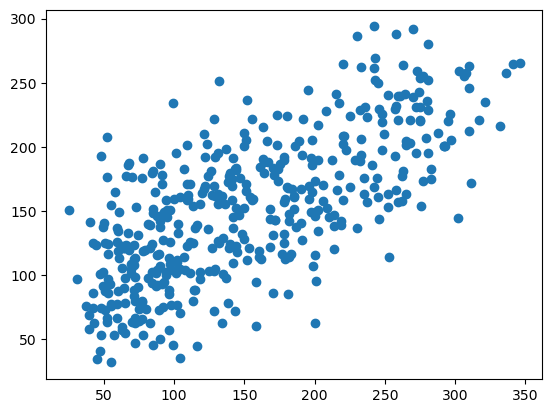

In [4]:
import pandas as pd
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt

# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

# k-fold cross validation
 
 # Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# fit a model
model = linear_model.LinearRegression()

# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

# Decision Tree Classifier

In [5]:
# Run this program on your local python 
# interpreter, provided you have installed 
# the required libraries. 
  
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
# Function importing Dataset 
def importdata(): 
    balance_data = pd.read_csv( 
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data', 
    sep= ',', header = None) 
      
    # Printing the dataswet shape 
    print ("Dataset Length: ", len(balance_data)) 
    print ("Dataset Shape: ", balance_data.shape) 
      
    # Printing the dataset obseravtions 
    print ("Dataset: ",balance_data.head()) 
    return balance_data 
  
# Function to split the dataset 
def splitdataset(balance_data): 
  
    # Seperating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0] 
  
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(
            criterion = "gini", 
            random_state = 100,
            max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", 
            random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    #print("Predicted values:") 
    #print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : \n", 
    classification_report(y_test, y_pred)) 
  
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
      
      
# Calling main function 
if __name__=="__main__": 
    main() 

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Results Using Gini Index:
Confusion Matrix: 
 [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]
Accuracy :  73.40425531914893
Report : 
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188

Results Using Entropy:
Confusion Matrix: 
 [[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]
Accuracy :  70.74468085106383
Report : 
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.71      0.74      0.72        85
           R       0.71      0.78      0.74        90

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metr

# Bagging

In [6]:
# Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

seed = 7
kfold = model_selection.KFold(n_splits=10)

cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Bagging Accuracy : ",results.mean())

Bagging Accuracy :  0.7720437457279563


# Boosting

In [7]:
# Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10)

model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Gradient Boosting Accuracy : ",results.mean())

Gradient Boosting Accuracy :  0.7681989063568012


# Random Forest

In [8]:
# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Random Forest Accuracy : ",results.mean())

Random Forest Accuracy :  0.7669343814080655


# Adaboost

In [9]:
# AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10)

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Adaboost Accuracy : ",results.mean())

Adaboost Accuracy :  0.760457963089542
